In [53]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.colors import BoundaryNorm

from scipy.spatial import cKDTree

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_downscale as ART_down

## Create ENSEMBLE for Products Quantiles

In [43]:
dir_font = os.path.join('/')
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','6_DOWN_BCorrected','QUANTILE')

In [44]:
veneto_dir = os.path.join(dir_font,'media','arturo','T9','Data','shapes','Europa','Italy')
if os.path.exists(veneto_dir):
    ITALY = gpd.read_file(os.path.join(veneto_dir,'Italy_clear.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [20]:
seeds_list = [7, 19, 31, 53, 89, 127, 211, 307, 401, 509, 613, 727, 839, 947, 1051]

In [54]:
Mev_levels = np.arange(60, 390, 10)
Mev_cmap = plt.cm.Spectral_r
norm = BoundaryNorm(Mev_levels, ncolors=Mev_cmap.N, clip=True)

In [45]:
IM_LLc_50 = None
for nn, ss in enumerate(seeds_list):
    dir_in = os.path.join(dir_base, f'ITALY_DOWN_IMERG_1dy_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_QQc_LLc_{str(ss).zfill(4)}.nc')
    DATA = xr.open_dataset(dir_in)
    if IM_LLc_50 is None:
        lats_IM = DATA.lat.values
        lons_IM = DATA.lon.values
        IM_LLc_50 = np.zeros([len(seeds_list),len(lats_IM),len(lons_IM)])
    IM_LLc_50[nn,:,:] = DATA.MEVd_LLc.values
IM_mean_LLc_50 = np.mean(IM_LLc_50,axis=0)
IM_std_LLc_50 = np.std(IM_LLc_50,axis=0)
lon2d_IM, lat2d_IM = np.meshgrid(lons_IM, lats_IM)

In [ ]:
CM_LLc_50 = None
for nn, ss in enumerate(seeds_list):
    dir_in = os.path.join(dir_base, f'ITALY_DOWN_CMORPH_3h_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_QQc_LLc_{str(ss).zfill(4)}.nc')
    DATA = xr.open_dataset(dir_in)
    if CM_LLc_50 is None:
        lats_CM = DATA.lat.values
        lons_CM = DATA.lon.values
        CM_LLc_50 = np.zeros([len(seeds_list),len(lats_CM),len(lons_CM)])
    CM_LLc_50[nn,:,:] = DATA.MEVd_LLc.values
CM_mean_LLc_50 = np.mean(CM_LLc_50,axis=0)
CM_std_LLc_50 = np.std(CM_LLc_50,axis=0)
lon2d_CM, lat2d_CM = np.meshgrid(lons_CM, lats_CM)

In [ ]:
MS_LLc_50 = None
for nn, ss in enumerate(seeds_list):
    dir_in = os.path.join(dir_base, f'ITALY_DOWN_MSWEP_3h_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_QQc_LLc_{str(ss).zfill(4)}.nc')
    DATA = xr.open_dataset(dir_in)
    if MS_LLc_50 is None:
        lats_MS = DATA.lat.values
        lons_MS = DATA.lon.values
        MS_LLc_50 = np.zeros([len(seeds_list),len(lats_MS),len(lons_MS)])
    MS_LLc_50[nn,:,:] = DATA.MEVd_LLc.values
MS_mean_LLc_50 = np.mean(MS_LLc_50,axis=0)
MS_std_LLc_50 = np.std(MS_LLc_50,axis=0)
lon2d_MS, lat2d_MS = np.meshgrid(lons_MS, lats_MS)

In [ ]:
ER_LLc_50 = None
for nn, ss in enumerate(seeds_list):
    dir_in = os.path.join(dir_base, f'ITALY_DOWN_ERA5_3h_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_QQc_LLc_{str(ss).zfill(4)}.nc')
    DATA = xr.open_dataset(dir_in)
    if ER_LLc_50 is None:
        lats_ER = DATA.lat.values
        lons_ER = DATA.lon.values
        ER_LLc_50 = np.zeros([len(seeds_list),len(lats_ER),len(lons_ER)])
    ER_LLc_50[nn,:,:] = DATA.MEVd_LLc.values
ER_mean_LLc_50 = np.mean(ER_LLc_50,axis=0)
ER_std_LLc_50 = np.std(ER_LLc_50,axis=0)
lon2d_ER, lat2d_ER = np.meshgrid(lons_ER, lats_ER)

In [65]:
GS_LLc_50 = None
for nn, ss in enumerate(seeds_list):
    dir_in = os.path.join(dir_base, f'ITALY_DOWN_GSMaP_3h_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_QQc_LLc_{str(ss).zfill(4)}.nc')
    DATA = xr.open_dataset(dir_in)
    if GS_LLc_50 is None:
        lats_GS = DATA.lat.values
        lons_GS = DATA.lon.values
        GS_LLc_50 = np.zeros([len(seeds_list),len(lats_GS),len(lons_GS)])
    GS_LLc_50[nn,:,:] = DATA.MEVd_LLc.values
GS_mean_LLc_50 = np.mean(GS_LLc_50,axis=0)
GS_std_LLc_50 = np.std(GS_LLc_50,axis=0)
lon2d_GS, lat2d_GS = np.meshgrid(lons_GS, lats_GS)

In [62]:
CH_LLc_50 = None
for nn, ss in enumerate(seeds_list):
    dir_in = os.path.join(dir_base, f'ITALY_DOWN_CHIRPS_1dy_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_QQc_LLc_{str(ss).zfill(4)}.nc')
    DATA = xr.open_dataset(dir_in)
    if CH_LLc_50 is None:
        lats_CH = DATA.lat.values
        lons_CH = DATA.lon.values
        CH_LLc_50 = np.zeros([len(seeds_list),len(lats_CH),len(lons_CH)])
    CH_LLc_50[nn,:,:] = DATA.MEVd_LLc.values
CH_mean_LLc_50 = np.mean(CH_LLc_50,axis=0)
CH_std_LLc_50 = np.std(CH_LLc_50,axis=0)
lon2d_CH, lat2d_CH = np.meshgrid(lons_CH, lats_CH)

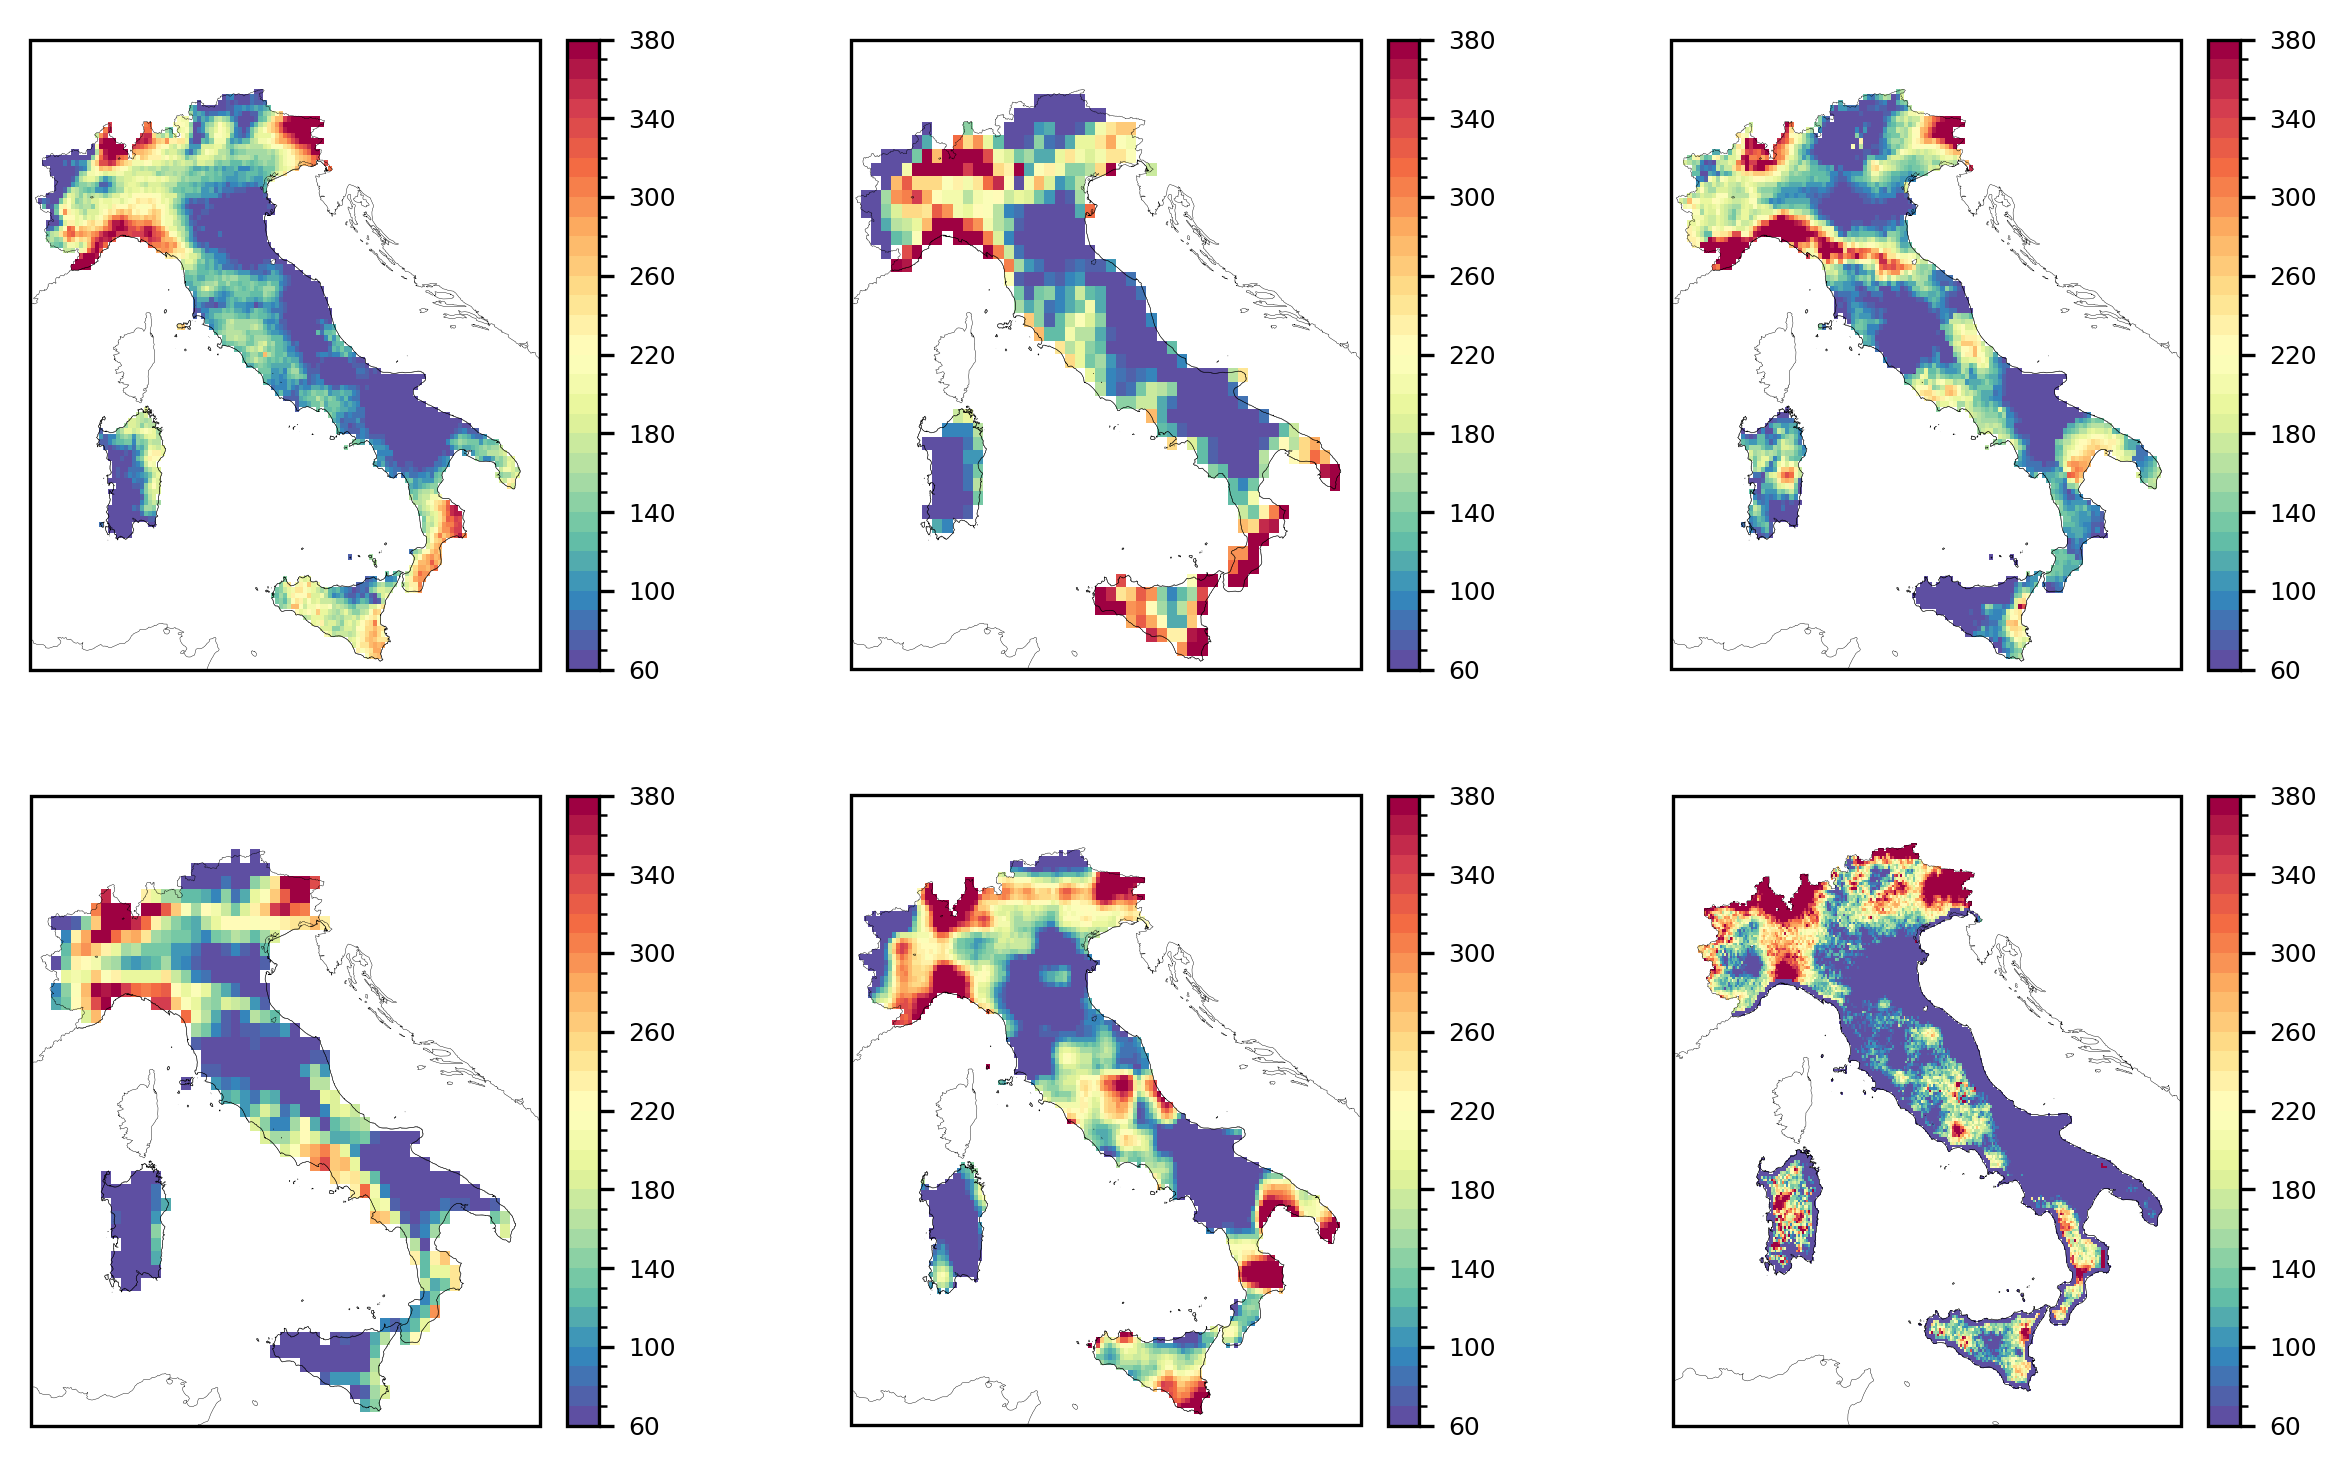

In [68]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,6),dpi=300)
gs = gridspec.GridSpec(2,3)

# ========================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
ITALY.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
a1 = ax1.pcolormesh(lon2d_IM, lat2d_IM, IM_mean_LLc_50, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6)

# ========================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
ITALY.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
a1 = ax1.pcolormesh(lon2d_CM, lat2d_CM, CM_mean_LLc_50, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6)

# ========================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
ITALY.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
a1 = ax1.pcolormesh(lon2d_MS, lat2d_MS, MS_mean_LLc_50, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6)

# ========================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
ITALY.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
a1 = ax1.pcolormesh(lon2d_ER, lat2d_ER, ER_mean_LLc_50, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6)

# ========================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
ITALY.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
a1 = ax1.pcolormesh(lon2d_GS, lat2d_GS, GS_mean_LLc_50, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6)

# ========================================================================
ax1 = plt.subplot(gs[1, 2], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
ITALY.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
a1 = ax1.pcolormesh(lon2d_CH, lat2d_CH, CH_mean_LLc_50, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6)

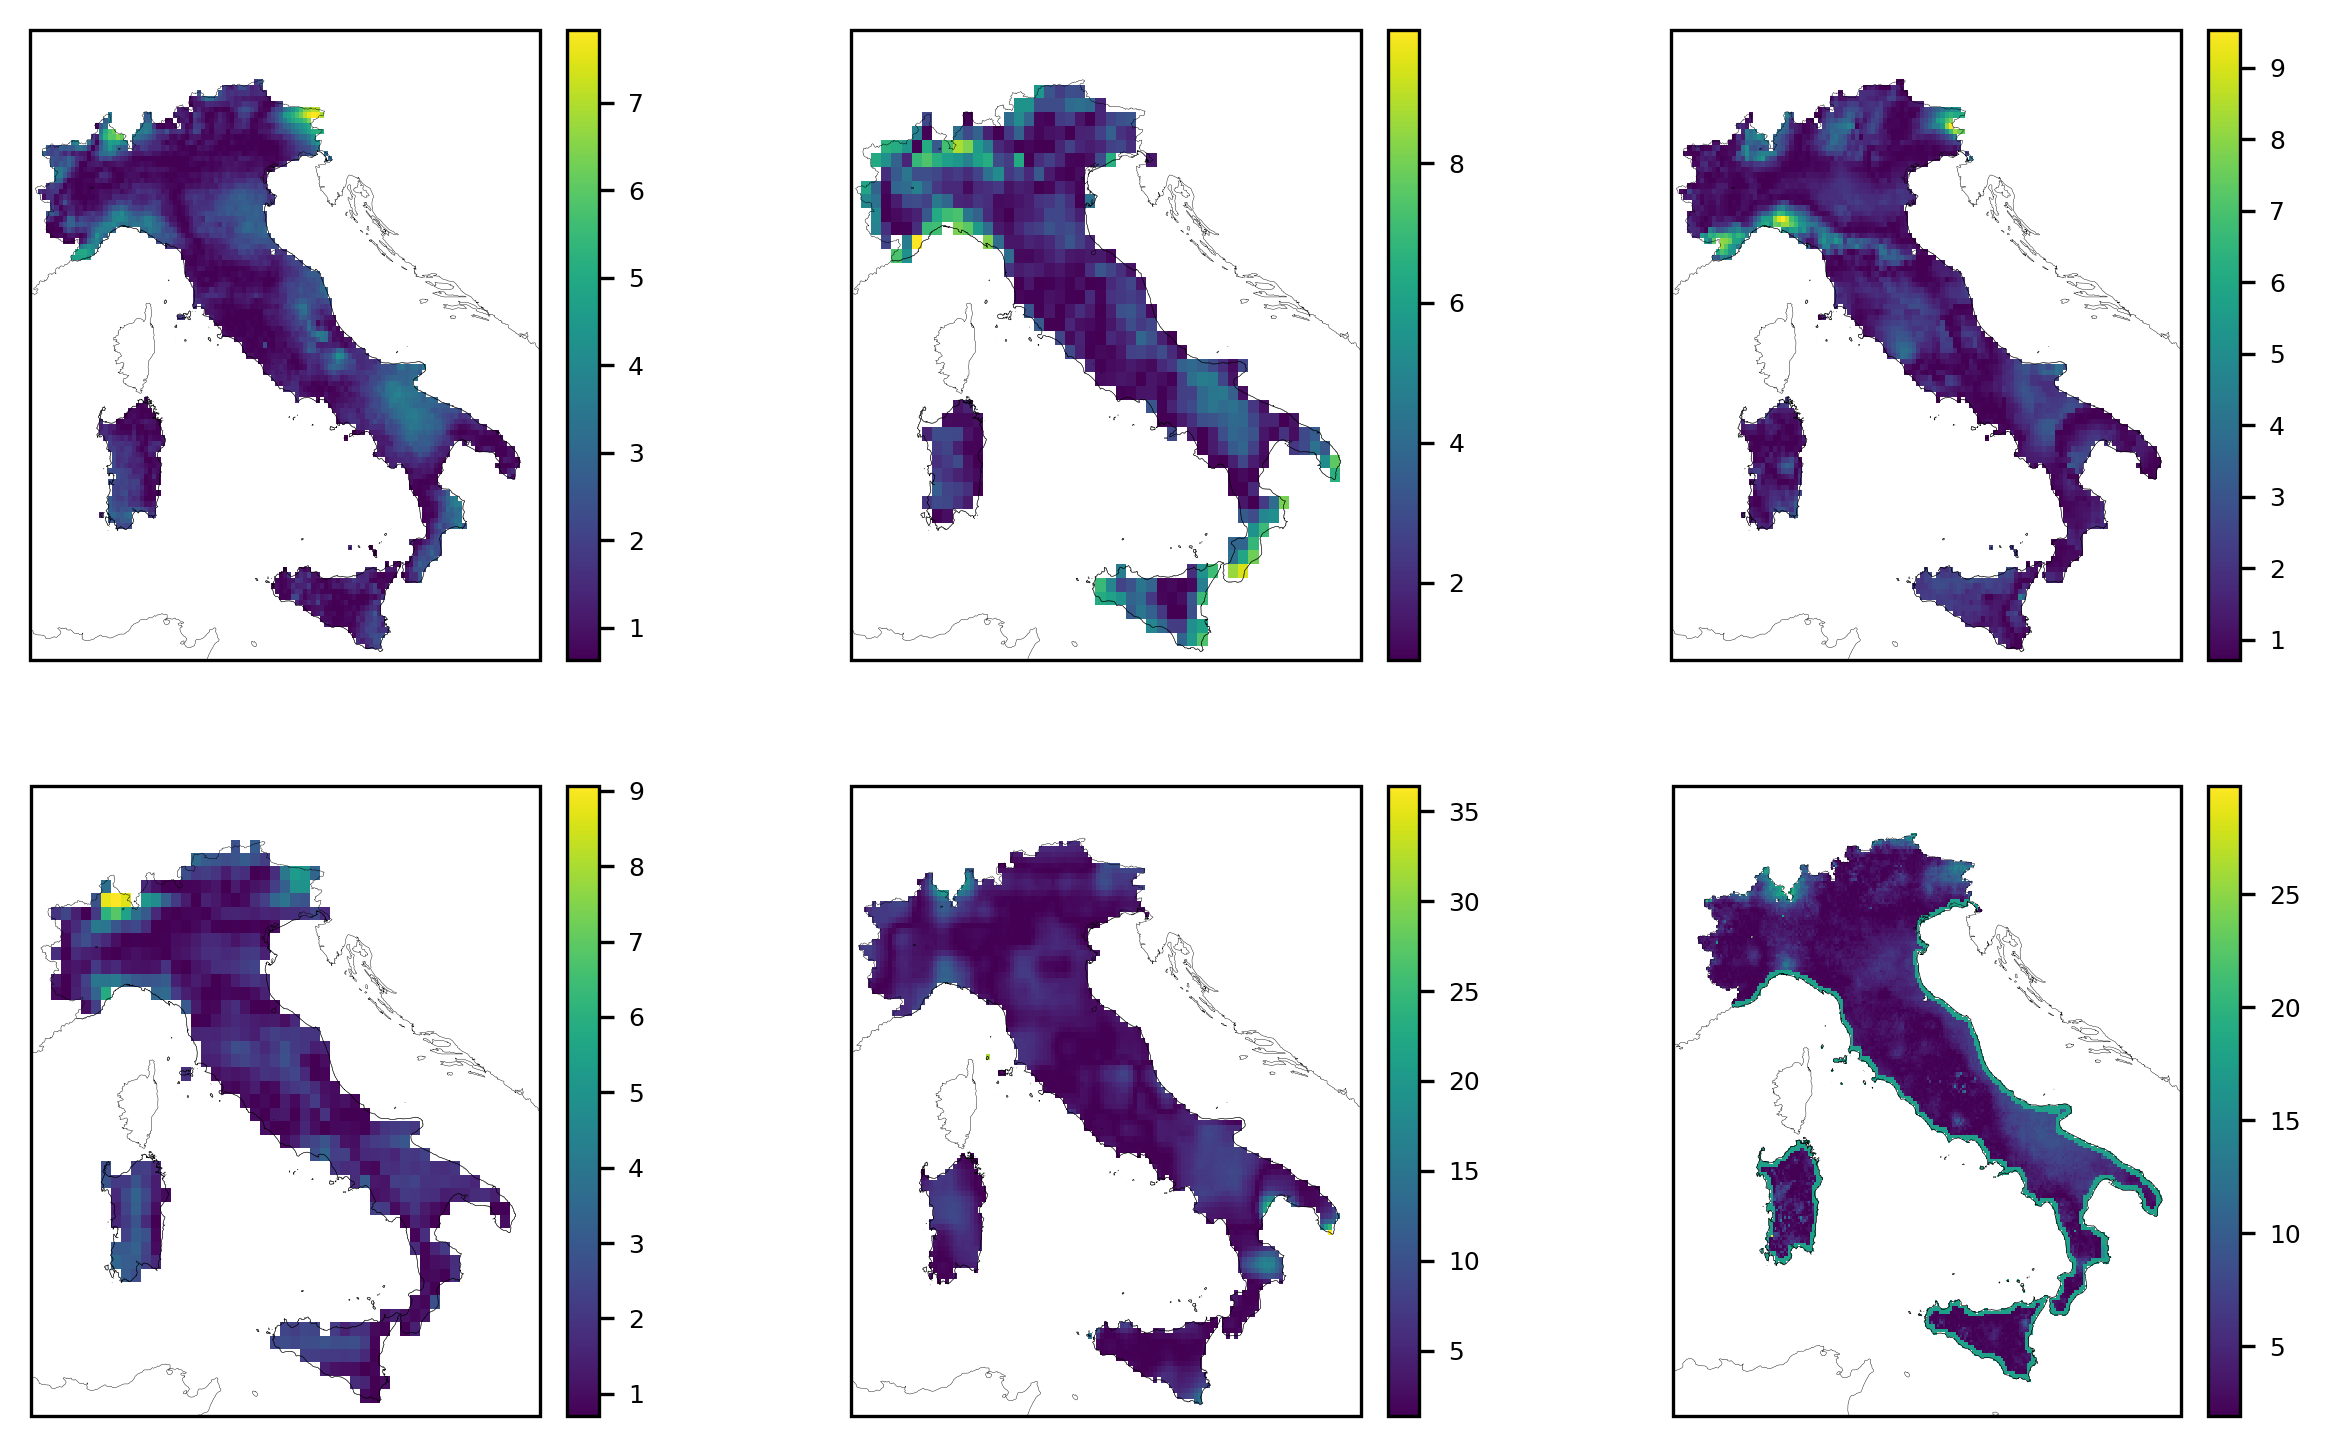

In [70]:
std_cmap = None
std_norm = None

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,6),dpi=300)
gs = gridspec.GridSpec(2,3)

# ========================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
ITALY.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
a1 = ax1.pcolormesh(lon2d_IM, lat2d_IM, IM_std_LLc_50, cmap=std_cmap, norm=std_norm)
cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6)

# ========================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
ITALY.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
a1 = ax1.pcolormesh(lon2d_CM, lat2d_CM, CM_std_LLc_50, cmap=std_cmap, norm=std_norm)
cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6)

# ========================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
ITALY.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
a1 = ax1.pcolormesh(lon2d_MS, lat2d_MS, MS_std_LLc_50, cmap=std_cmap, norm=std_norm)
cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6)

# ========================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
ITALY.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
a1 = ax1.pcolormesh(lon2d_ER, lat2d_ER, ER_std_LLc_50, cmap=std_cmap, norm=std_norm)
cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6)

# ========================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
ITALY.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
a1 = ax1.pcolormesh(lon2d_GS, lat2d_GS, GS_std_LLc_50, cmap=std_cmap, norm=std_norm)
cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6)

# ========================================================================
ax1 = plt.subplot(gs[1, 2], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
ITALY.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
a1 = ax1.pcolormesh(lon2d_CH, lat2d_CH, CH_std_LLc_50, cmap=std_cmap, norm=std_norm)
cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6)